In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import random

In [2]:
# xs = np.array([1,2,3,4,5,6])
# ys = np.array([5,4,6,5,6,7])
#now lets create a dataset and run linear regression on it
def create_dataset(n,variance,step=2,correlation=False):
    val=1
    ys = []
    for i in range(n):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs), np.array(ys)

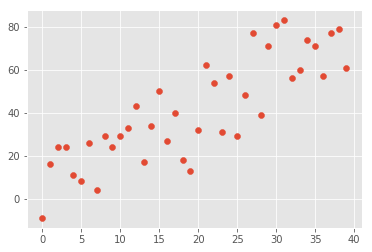

In [3]:
xs,ys = create_dataset(40, 30, 2, correlation='pos')
#plotting the dataset
plt.scatter(xs,ys)
plt.show()

In [4]:
#lets try to figure out best fit line for above data

In [5]:
def best_fit_m_b(xs,ys):
    m = (((np.mean(xs)*np.mean(ys))-np.mean(xs*ys))/(np.mean(xs)**2-np.mean(xs**2)))
    b = np.mean(ys)-m*np.mean(xs)
    return m,b

In [6]:
m,b = best_fit_m_b(xs,ys)
print(m,b)

1.7360225140712948 7.64756097560975


In [7]:
#so lets make our regression line by plotting ys for every xs
regression_line = [(m*x)+b for x in xs]

In [8]:
x_pred = 8
y_pred = m*x_pred + b

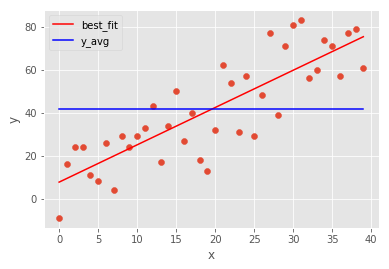

In [9]:
y_avg = [np.mean(ys) for y in ys]
plt.scatter(xs,ys)
plt.xlabel('x')
plt.ylabel('y')
# plt.scatter(x_pred,y_pred,color = 'yellow')
plt.plot(xs,regression_line,color = 'red',label='best_fit')
plt.plot(xs,y_avg,color='blue',label='y_avg')
plt.legend()
plt.show()

In [10]:
#calculating the goodness of fit by R**2 method
def sq_error(y_req,ys):
    return sum((ys-y_req)**2)
     
y_minus_y_hat = []
def r_squared(ys,y_avg,y_reg):
    ss_tot = sq_error(y_avg,ys)
    ss_res = sq_error(y_reg,ys)
#     errors_ka_square_from_y_avg_line = [(y-np.mean(ys))**2 for y in ys]#errors_ka_square_from_y_avg_line 
# #     for a,b in zip(regression_line,ys):
# #         y_minus_y_hat.append((b-a)**2)
#     ss_res = sum(y_minus_y_hat) 
    r_sq = 1 - (ss_res/ss_tot)
    return r_sq

In [11]:
r_sq = r_squared(ys,y_avg,regression_line)
print(r_sq)

0.7010918436933349
